##**Walmart Capstone Project**

**A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.**
* **Link:https://drive.google.com/file/d/1zyEe3FbzyjhgijGPgT1NPa7B8DyR0p_9/view?usp=sharing**

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
import warnings
warnings.filterwarnings('ignore')

In [427]:
df=pd.read_csv('/content/Walmart DataSet.csv')

In [428]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**1.You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:**

In [429]:
df.shape

(6435, 8)

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [431]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [432]:
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [434]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [435]:
df.dropna(inplace=True)

In [436]:
df.duplicated().sum()

np.int64(0)

In [437]:
df.drop_duplicates(inplace=True)

**HEATMAP**

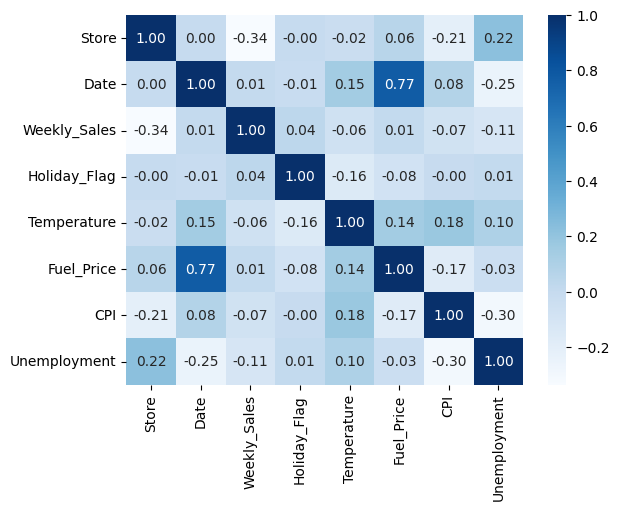

In [438]:
sns.heatmap(df.corr(),cmap='Blues',fmt=".2f",annot=True)
plt.show()

**Histogram**

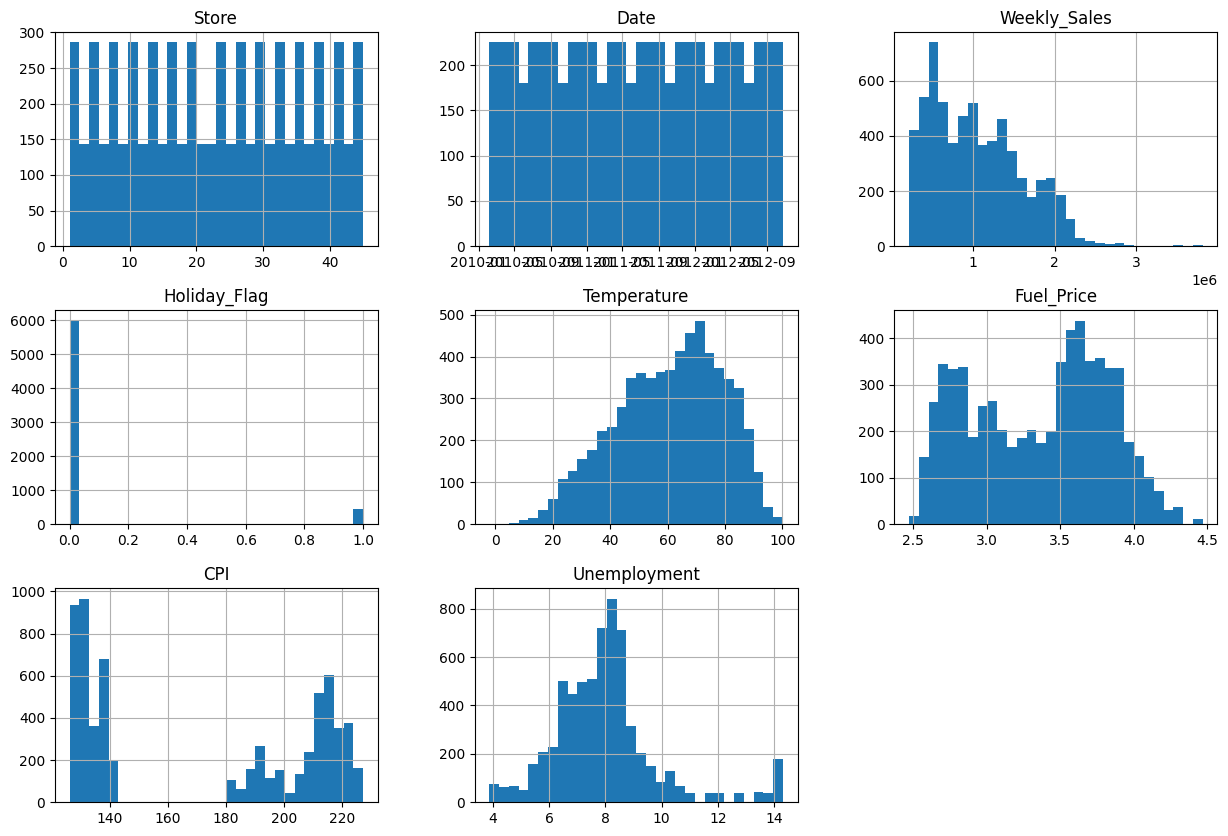

In [439]:
df.hist(bins=30,figsize=(15,10))
plt.show()

In [440]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

**Scatter plot**

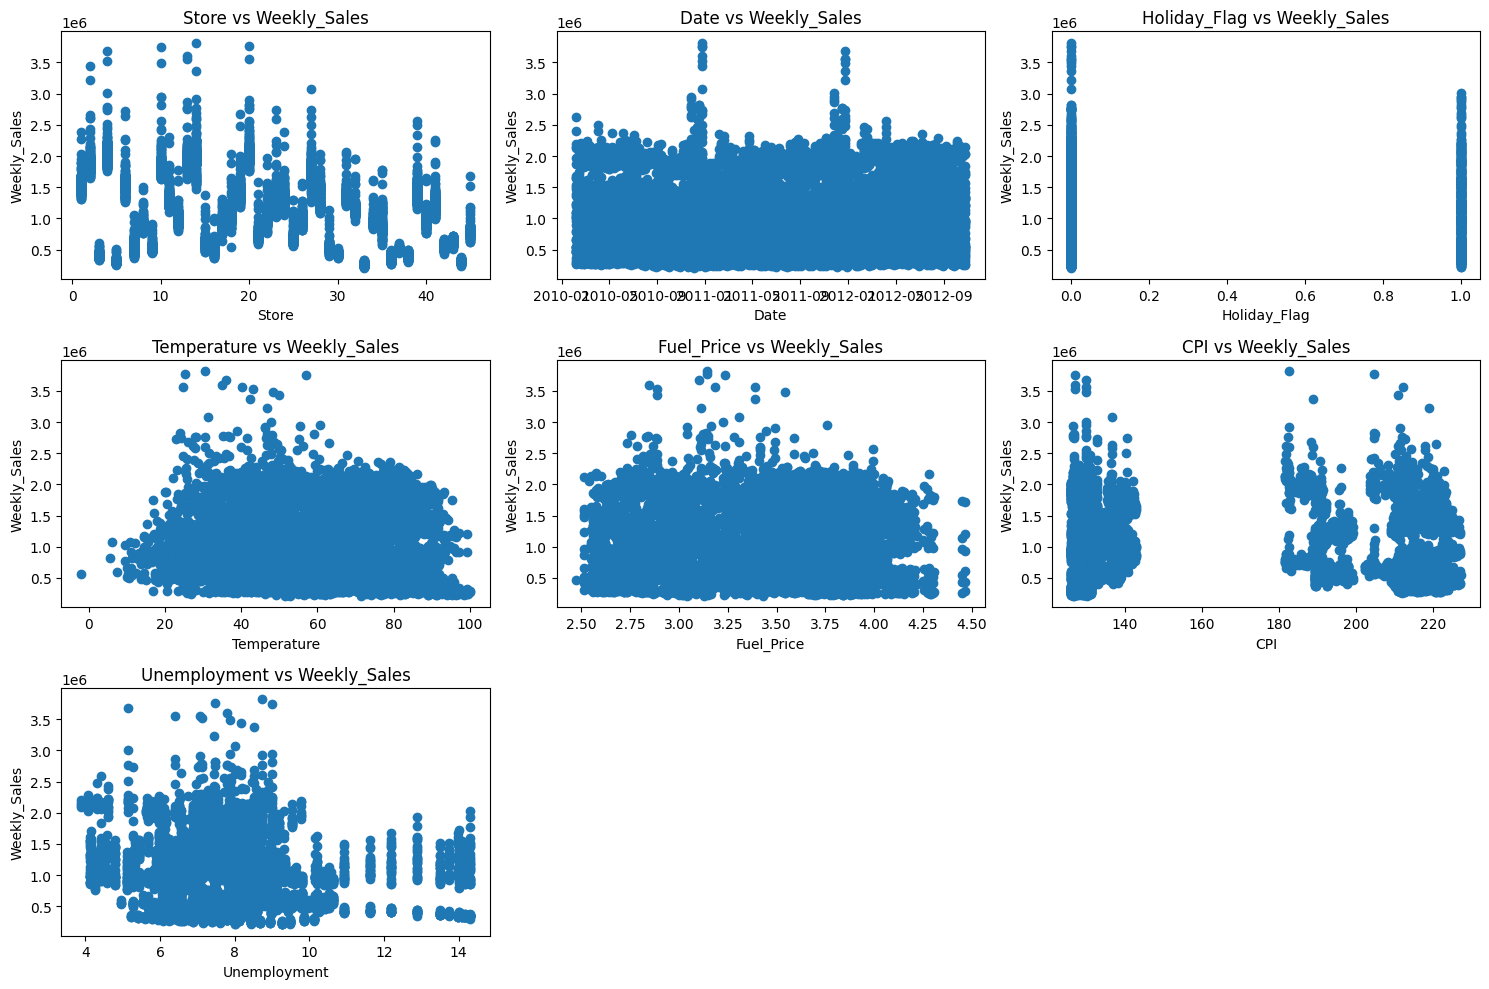

In [441]:
col_list=[]
for i in df.columns:
  if i=='Weekly_Sales':
    continue
  else:
    col_list.append(i)
plt.figure(figsize=(15,10))
for i,col in enumerate(col_list):
  if col!='Weekly_Sales':
    plt.subplot(3,3,i+1)
    plt.scatter(df[col],df['Weekly_Sales'])
    plt.title(f"{col} vs Weekly_Sales")
    plt.xlabel(col)
    plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

**Outliers Detection**

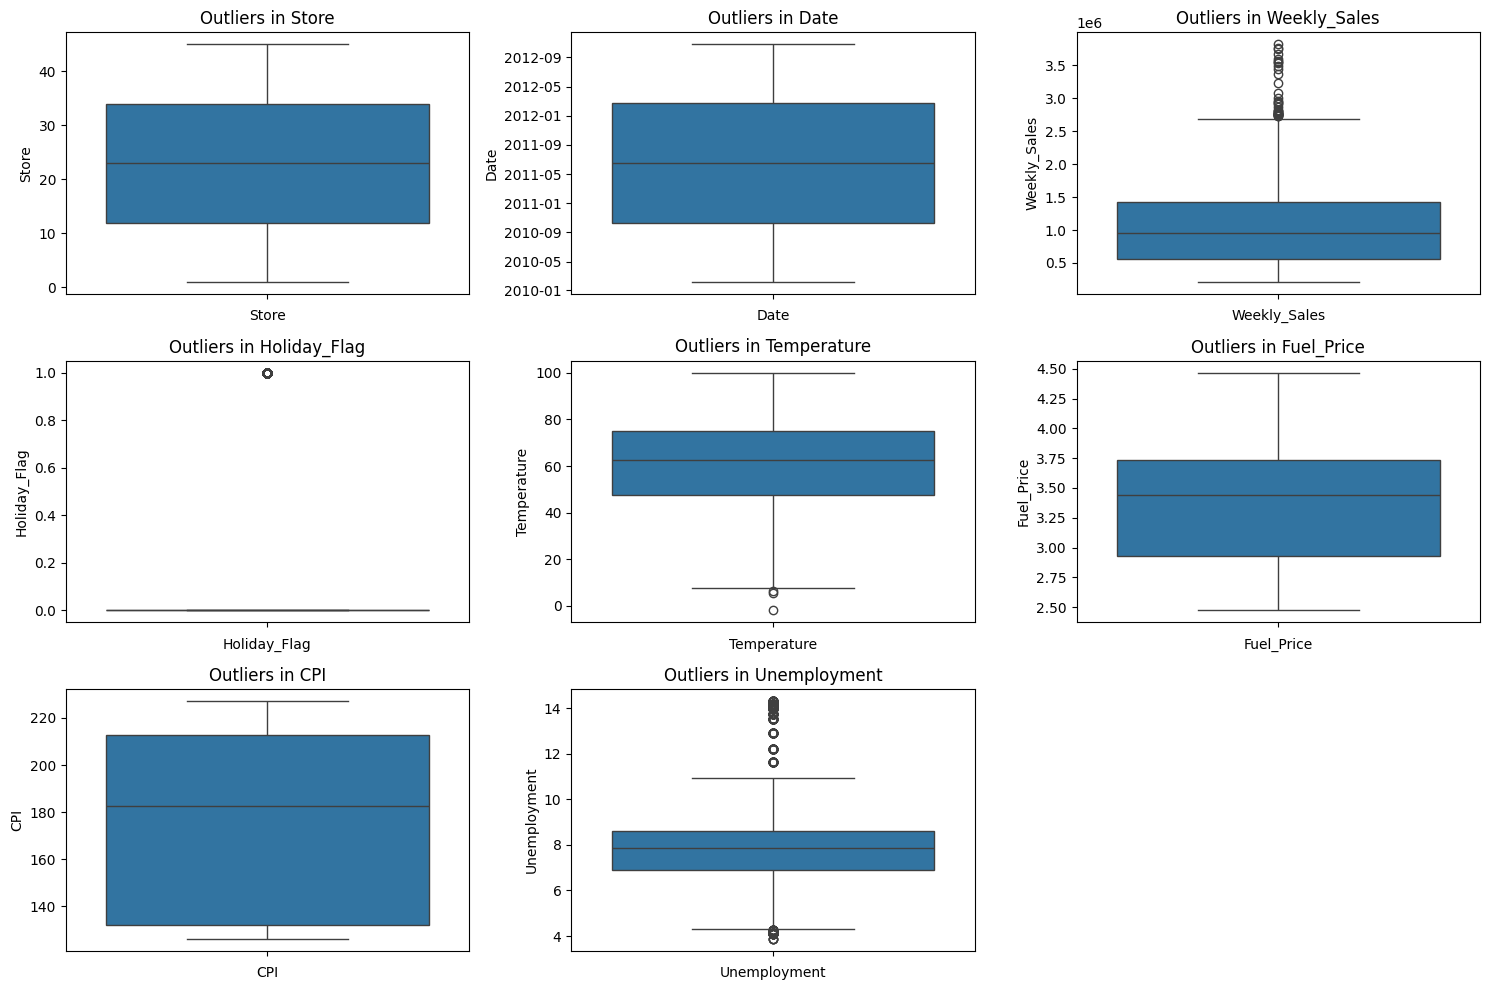

In [442]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[col])
  plt.title(f"Outliers in {col}")
  plt.xlabel(col)
plt.tight_layout()
plt.show()


In [443]:
outliers_columns=['Weekly_Sales','Holiday_Flag','Temperature','Unemployment']
for i in outliers_columns:
  LW=df[i].quantile(0.25)
  UW=df[i].quantile(0.75)
  IQR=UW-LW
  lower_bound=LW-1.5*IQR
  upper_bound=UW+1.5*IQR
  df=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

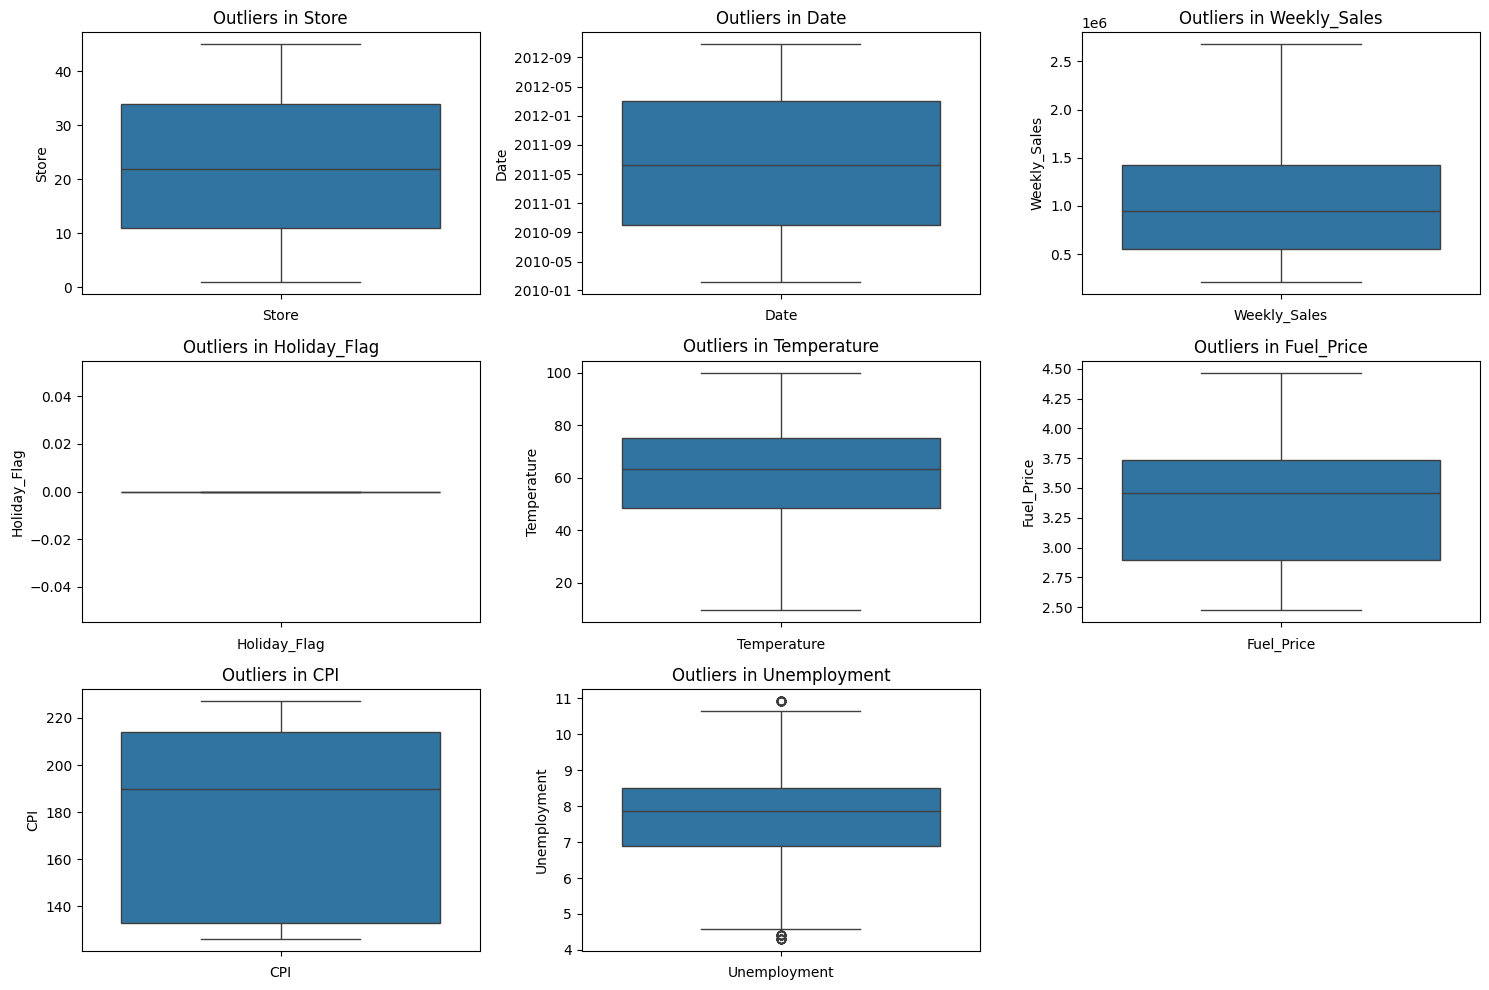

In [444]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[col])
  plt.title(f"Outliers in {col}")
  plt.xlabel(col)
plt.tight_layout()
plt.show()

In [445]:
df.shape

(5507, 8)

**a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?**

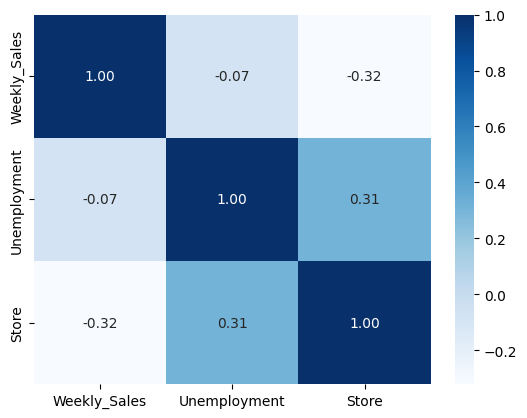

In [446]:
sns.heatmap(df[['Weekly_Sales','Unemployment','Store']].corr(),cmap='Blues',annot=True,fmt='.2f')
plt.show()

In [508]:
store_groupby=df.groupby('Store')[['Weekly_Sales','Unemployment']].corr().unstack()['Weekly_Sales']['Unemployment'].reset_index()
stote_groupby=pd.DataFrame(store_groupby)
store_groupby=store_groupby.rename(columns={'Unemployment':'Correlation coefficient'})
store_groupby.head(4)

,Store,Correlation coefficient
0,1,$-0.12
1,2,$0.04
2,3,$-0.28
3,4,$-0.66


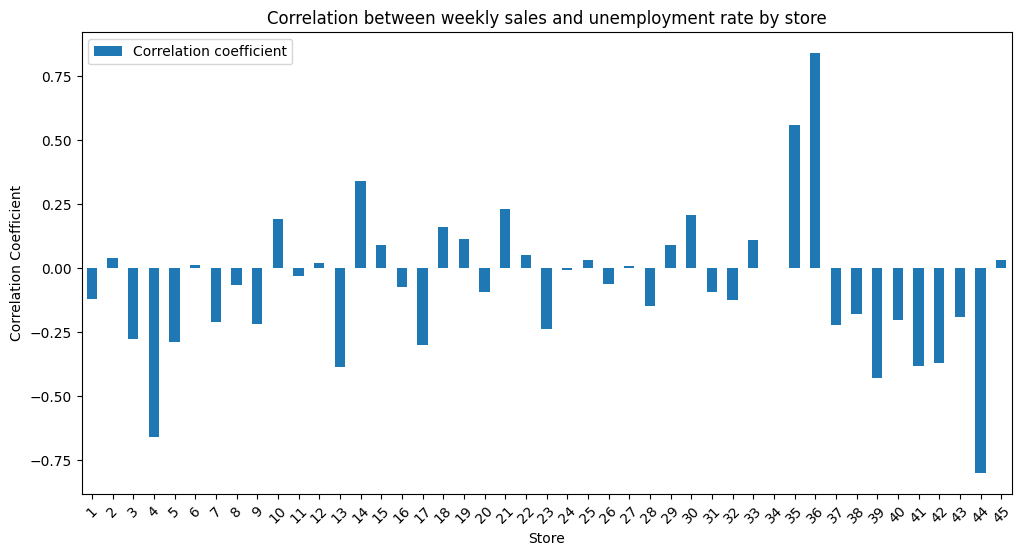

In [448]:
store_groupby = store_groupby.set_index('Store')
store_groupby.plot(kind='bar', figsize=(12, 6))
plt.title('Correlation between weekly sales and unemployment rate by store')
plt.xlabel('Store')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


In [509]:
coef=store_groupby['Correlation coefficient'].sort_values(ascending=True)
coef.head(5)

,Correlation coefficient
43,$-0.80
3,$-0.66
38,$-0.43
12,$-0.38
40,$-0.38


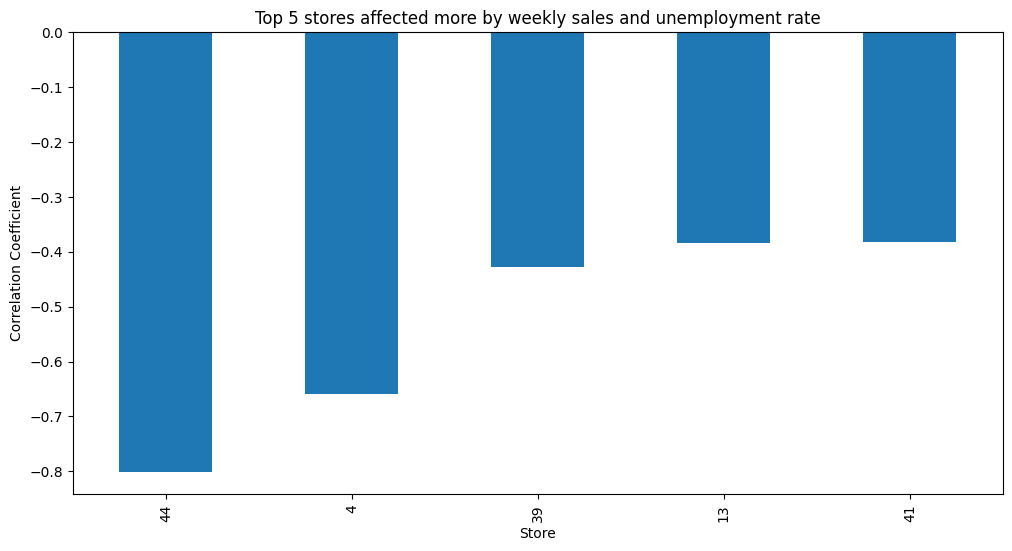

In [450]:
coef.head(5).plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 stores affected more by weekly sales and unemployment rate')
plt.xlabel('Store')
plt.ylabel('Correlation Coefficient')
plt.show()

In [451]:
most_affected_stores=coef.head(5).reset_index()
for i in range(len(most_affected_stores)):
     print(f"The top  five most affected stores due to weekly sales and unemployment rate : {most_affected_stores['Store'][i]}")

The top  five most affected stores due to weekly sales and unemployment rate : 44
The top  five most affected stores due to weekly sales and unemployment rate : 4
The top  five most affected stores due to weekly sales and unemployment rate : 39
The top  five most affected stores due to weekly sales and unemployment rate : 13
The top  five most affected stores due to weekly sales and unemployment rate : 41


**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

In [510]:
df=df.sort_values('Date')
df.head(6)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,2010-02-05,"$1,643,690.90",0,$42.31,$2.57,$211.10,$8.11,2
2145,16,2010-02-05,"$477,409.30",0,$19.79,$2.58,$189.38,$7.04,2
2288,17,2010-02-05,"$789,036.02",0,$23.11,$2.67,$126.44,$6.55,2
1716,13,2010-02-05,"$1,967,220.53",0,$31.53,$2.67,$126.44,$8.32,2
6149,44,2010-02-05,"$281,090.95",0,$31.53,$2.67,$126.44,$8.12,2
2431,18,2010-02-05,"$1,205,307.50",0,$21.33,$2.79,$131.53,$9.20,2


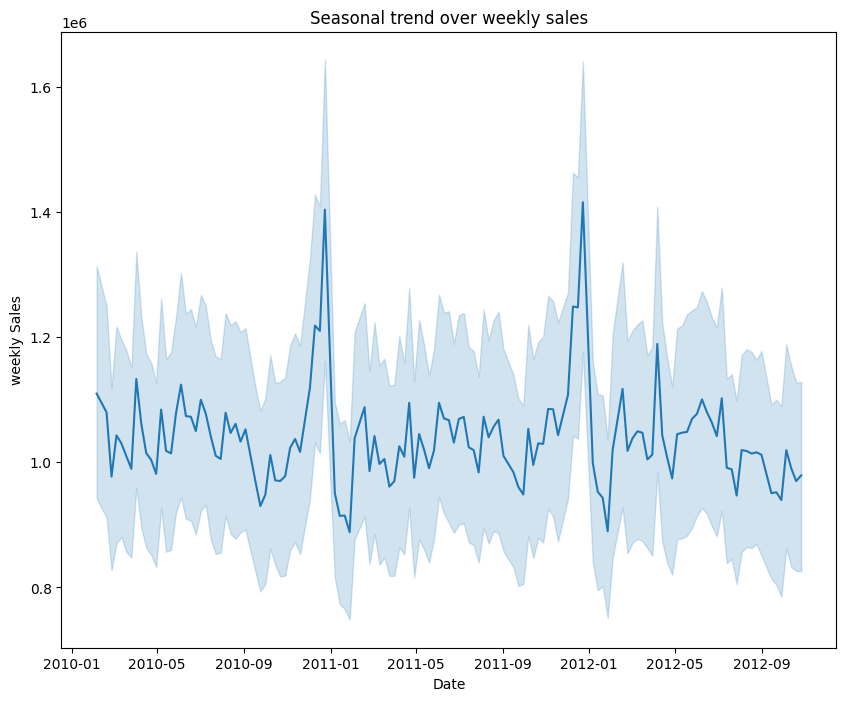

In [453]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Date',y='Weekly_Sales')
plt.title("Seasonal trend over weekly sales")
plt.xlabel("Date")
plt.ylabel("weekly Sales")
plt.show()

<Figure size 1500x800 with 0 Axes>

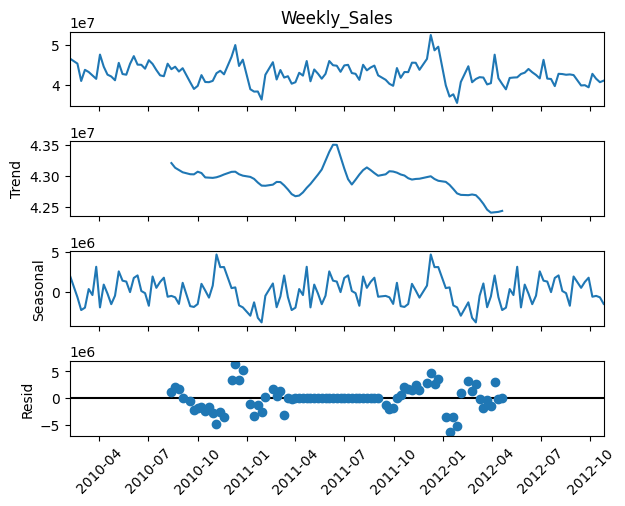

In [454]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_model=df.groupby('Date')['Weekly_Sales'].sum().sort_index()
seasonal_model
decomposition=seasonal_decompose(seasonal_model,model='additive',period=52)

plt.figure(figsize=(15,8))
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

In [455]:
weekly_sales=df.groupby('Date')['Weekly_Sales'].sum().sort_index()
sales_df=weekly_sales.reset_index()
sales_df['Month']=sales_df['Date'].dt.month
sales_df['Year']=sales_df['Date'].dt.year
sales_df.head()

,Date,Weekly_Sales,Month,Year
0,2010-02-05,46619845.70,2,2010
1,2010-02-19,45363033.79,2,2010
2,2010-02-26,41043557.90,2,2010
3,2010-03-05,43813776.69,3,2010
4,2010-03-12,43270901.25,3,2010


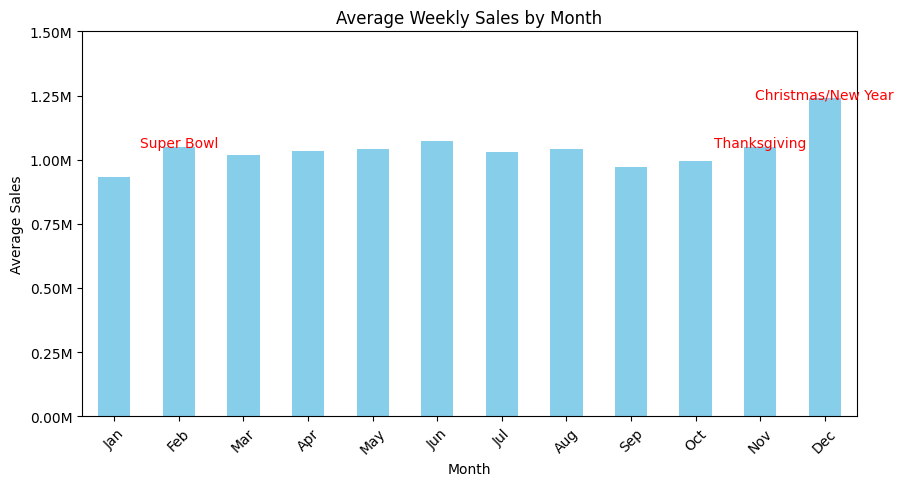

In [456]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Weekly_Sales'].mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar', color="skyblue")
plt.title("Average Weekly Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(
    ticks=range(12),
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    rotation=45
)
plt.yticks(ticks=[0, 250000, 500000, 750000, 1000000, 1250000, 1500000],labels=['0.00M','0.25M','0.50M','0.75M','1.00M','1.25M','1.50M'])
plt.text(11, monthly_avg[12], "Christmas/New Year", ha='center', color='red')
plt.text(10, monthly_avg[11], "Thanksgiving", ha='center', color='red')
plt.text(1, monthly_avg[2], "Super Bowl", ha='center', color='red')

plt.show()
plt.show()


**c. Does temperature affect the weekly sales in any manner?**

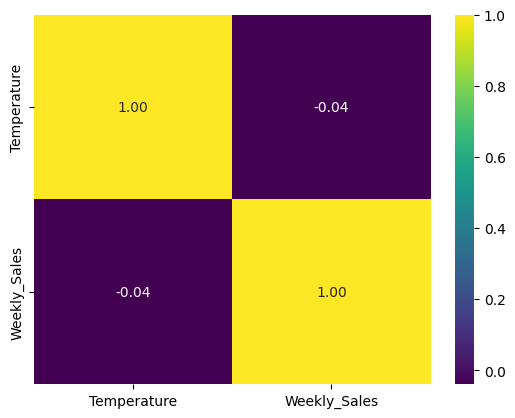

In [457]:
sns.heatmap(df[['Temperature','Weekly_Sales']].corr(),cmap='viridis',annot=True,fmt='.2f')
plt.show()

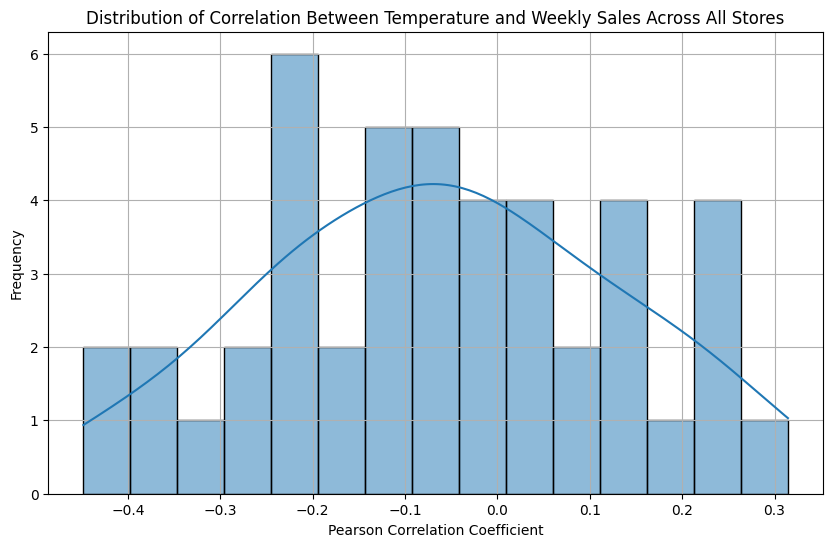

Correlation Summary Across All Stores:
Mean Correlation: -0.06
Median Correlation: -0.08
Standard Deviation: 0.19

Interpretation:
The histogram shows that the correlation between temperature and weekly sales is generally close to zero across most stores.
The mean and median correlation values are very low, suggesting that temperature does not have a strong linear effect on sales.
This indicates that temperature is not significant factor to determine weekly sales.


In [458]:
store_correlations = df.groupby('Store')[['Temperature', 'Weekly_Sales']].corr().unstack()['Temperature']['Weekly_Sales']
plt.figure(figsize=(10, 6))
sns.histplot(store_correlations, bins=15, kde=True)
plt.title('Distribution of Correlation Between Temperature and Weekly Sales Across All Stores')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print("Correlation Summary Across All Stores:")
print(f"Mean Correlation: {store_correlations.mean():.2f}")
print(f"Median Correlation: {store_correlations.median():.2f}")
print(f"Standard Deviation: {store_correlations.std():.2f}")
print("\nInterpretation:")
print("The histogram shows that the correlation between temperature and weekly sales is generally close to zero across most stores.")
print("The mean and median correlation values are very low, suggesting that temperature does not have a strong linear effect on sales.")
print("This indicates that temperature is not significant factor to determine weekly sales.")

**d. How is the Consumer Price index affecting the weekly sales of various stores?**

In [511]:
cust_corr=df.groupby('Store')[['CPI','Weekly_Sales']].corr().unstack()['CPI']['Weekly_Sales']
cust_corr=cust_corr.reset_index()
cust_corr=cust_corr.rename(columns={'Weekly_Sales':'Correlation coefficient'})
cust_corr=cust_corr.set_index('Store')
cust_corr.head()

,Correlation coefficient
Store,
1,$0.24
2,$-0.06
3,$0.36
4,$0.69
5,$0.37


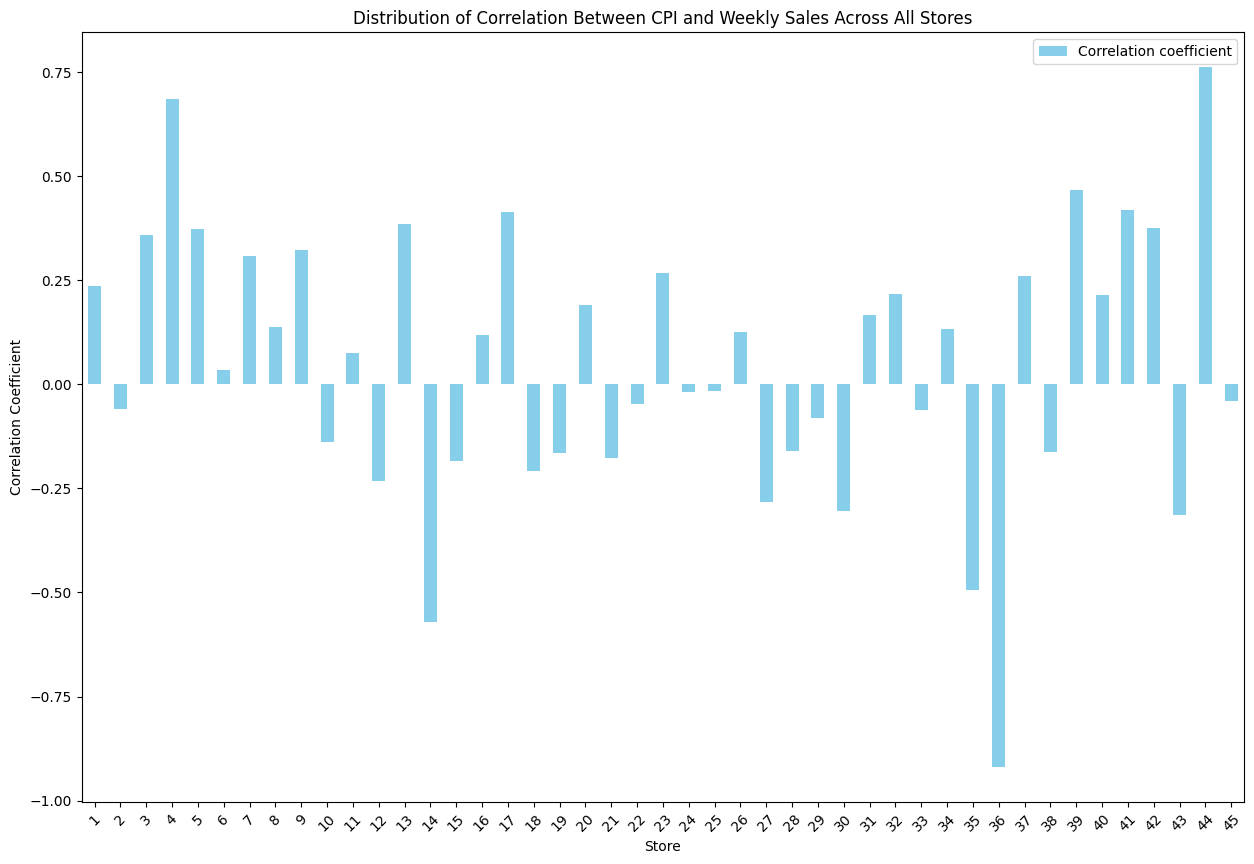

Correlation Summary Across All Stores:
Mean Correlation: -0.06
Median Correlation: -0.08
Standard Deviation: 0.19

-----------------------------------------------------
Top 5 Stores with Strongest Positive CPI Correlation:
-----------------------------------------------------
Store
27    0.314484
44    0.253145
16    0.233441
26    0.231184
12    0.216684

-----------------------------------------------------
Top 5 Stores with Strongest Negative CPI Correlation:
-----------------------------------------------------
Store
10   -0.448283
37   -0.413270
3    -0.391902
30   -0.357967
8    -0.301468

Interpretation:
The overall correlation between CPI and weekly sales is weak across the entire dataset.
However, the analysis of the top 5 stores reveals that a small number of stores have a stronger positive or negative correlation than the average.
This suggests that factors specific to these stores, such as their location or local economic conditions, might make them more sensitive to change

In [460]:
cust_corr.plot(kind='bar',figsize=(15,10),color='skyblue')
plt.title('Distribution of Correlation Between CPI and Weekly Sales Across All Stores')
plt.xlabel('Store')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()
top_5_positive = store_correlations.nlargest(5)
top_5_negative = store_correlations.nsmallest(5)
print("Correlation Summary Across All Stores:")
print(f"Mean Correlation: {store_correlations.mean():.2f}")
print(f"Median Correlation: {store_correlations.median():.2f}")
print(f"Standard Deviation: {store_correlations.std():.2f}")
print("\n-----------------------------------------------------")
print("Top 5 Stores with Strongest Positive CPI Correlation:")
print("-----------------------------------------------------")
print(top_5_positive.to_string())
print("\n-----------------------------------------------------")
print("Top 5 Stores with Strongest Negative CPI Correlation:")
print("-----------------------------------------------------")
print(top_5_negative.to_string())
print("\nInterpretation:")
print("The overall correlation between CPI and weekly sales is weak across the entire dataset.")
print("However, the analysis of the top 5 stores reveals that a small number of stores have a stronger positive or negative correlation than the average.")
print("This suggests that factors specific to these stores, such as their location or local economic conditions, might make them more sensitive to changes in the Consumer Price Index.")


**e.Top performing stores according to the historical data.**

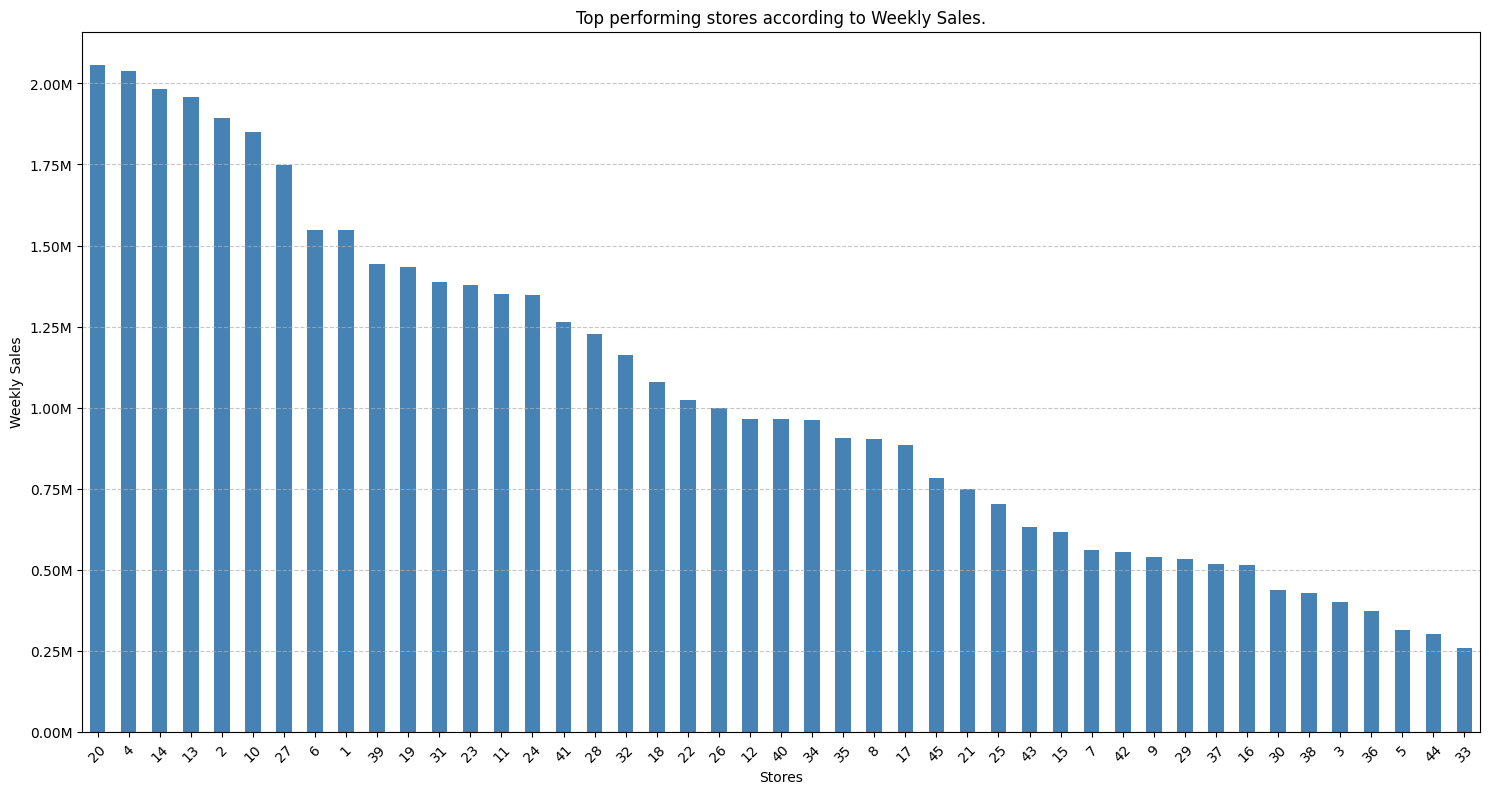


--------------------------------------------------------------------------------------------------
The five top performing store is Store 20


In [461]:
top_stores=df.groupby('Store')['Weekly_Sales'].mean()
top_stores=top_stores.sort_values(ascending=False)
plt.figure(figsize=(15,8))
top_stores.plot(kind='bar',color='steelblue')
plt.title("Top performing stores according to Weekly Sales.")
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(ticks=[0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000],labels=['0.00M','0.25M','0.50M','0.75M','1.00M','1.25M','1.50M','1.75M','2.00M'])
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
print("\n--------------------------------------------------------------------------------------------------")
top_store=pd.DataFrame(top_stores.sort_values(ascending=False).reset_index())
top_store=top_store.head(5)
print(f"The five top performing store is Store {top_store['Store'][0]}")

**f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.**

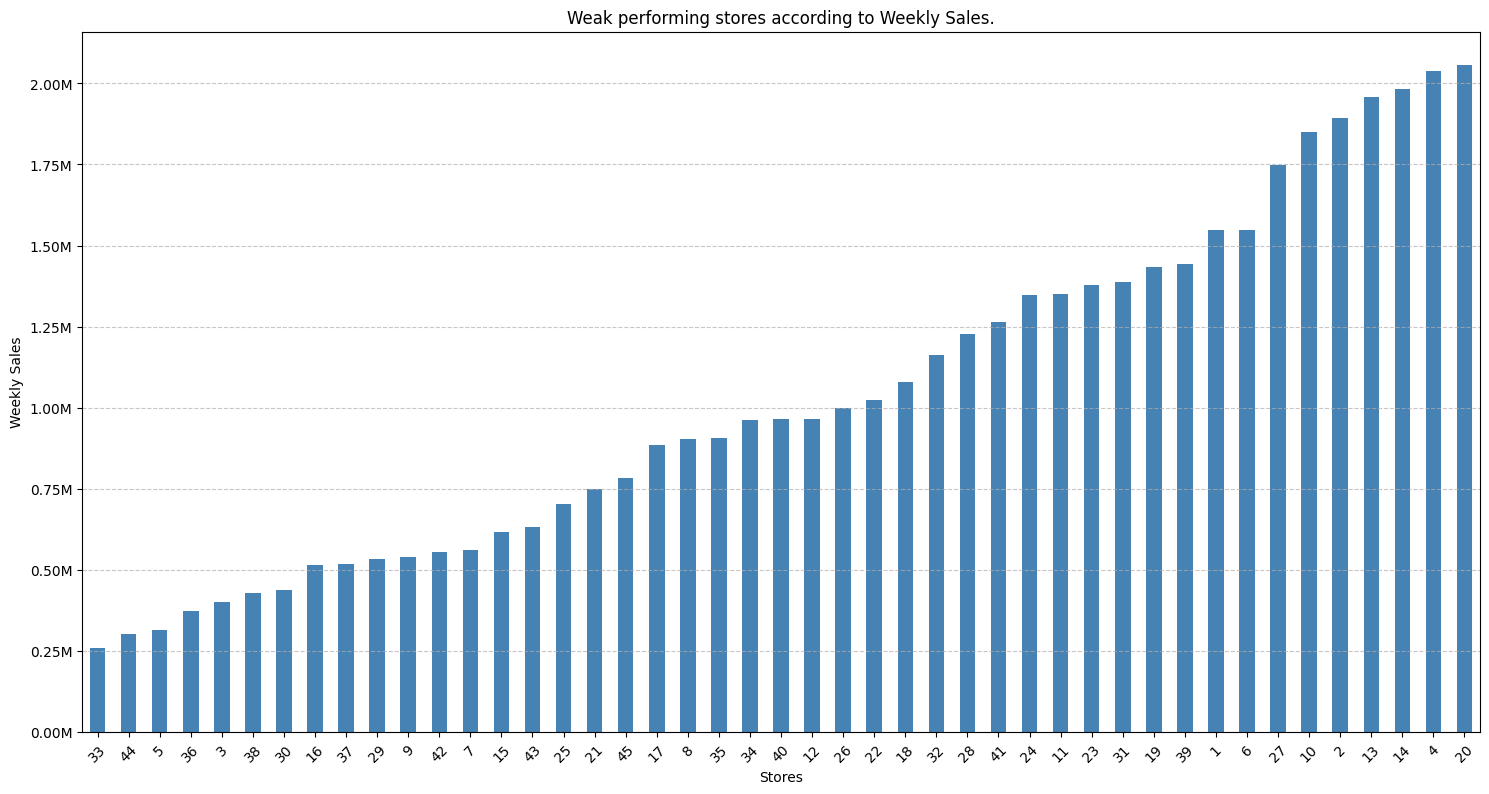

In [462]:
top_stores=df.groupby('Store')['Weekly_Sales'].mean()
top_stores=top_stores.sort_values(ascending=True)
plt.figure(figsize=(15,8))
top_stores.plot(kind='bar',color='steelblue')
plt.title("Weak performing stores according to Weekly Sales.")
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(ticks=[0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000],labels=['0.00M','0.25M','0.50M','0.75M','1.00M','1.25M','1.50M','1.75M','2.00M'])
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

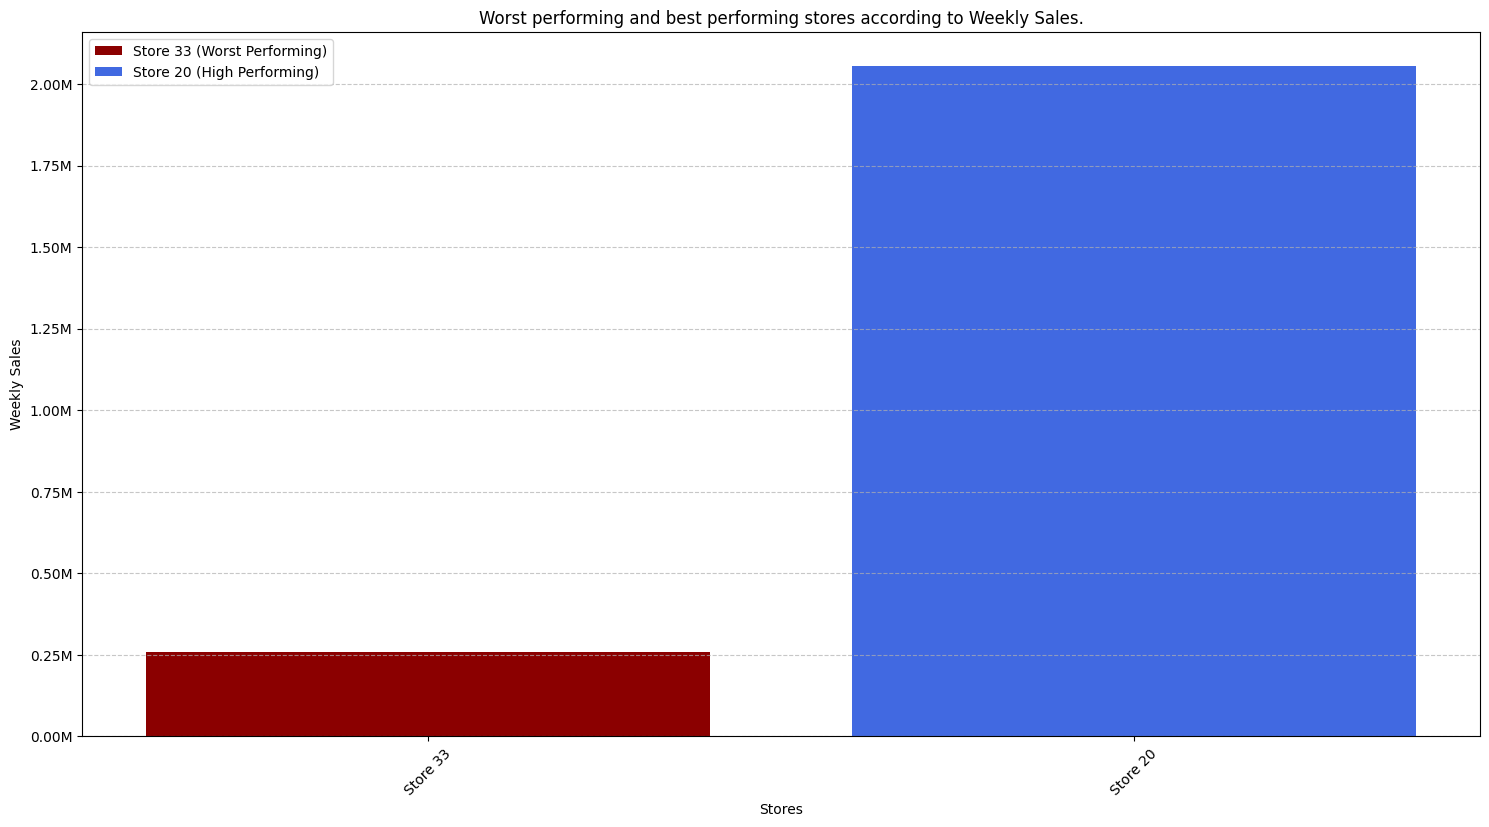


-----------------------------------------------------------------------------------------
Worst Performing Store is Store 20 with $259,656 Dollars
Highest average weekly sales Store 33 with $2,056,650 Dollars
Difference between highest and lowest performing stores: $1,796,994 Dollars


In [463]:
top_stores=df.groupby('Store')['Weekly_Sales'].mean()
top_stores=top_stores.sort_values(ascending=True)
store_33_sales = top_stores.loc[33]
store_20_sales = top_stores.loc[20]
plt.figure(figsize=(15,8))
plt.bar('Store 33', store_33_sales, color='darkred', label='Store 33 (Worst Performing)')

plt.bar('Store 20', store_20_sales, color='royalblue', label='Store 20 (High Performing)')

plt.title("Worst performing and best performing stores according to Weekly Sales.")
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(ticks=[0, 250000, 500000, 750000, 1000000,1250000,1500000,1750000,2000000],labels=['0.00M','0.25M','0.50M','0.75M','1.00M','1.25M','1.50M','1.75M','2.00M'])
plt.tight_layout()
plt.legend()
plt.xticks(rotation=45)
plt.show()
print("\n-----------------------------------------------------------------------------------------")
print(f"Worst Performing Store is Store 20 with ${top_stores.loc[33]:,.0f} Dollars")
print(f"Highest average weekly sales Store 33 with ${top_stores.loc[20]:,.0f} Dollars")
print(f"Difference between highest and lowest performing stores: ${top_stores.loc[20]-top_stores.loc[33]:,.0f} Dollars")

**2.Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.**

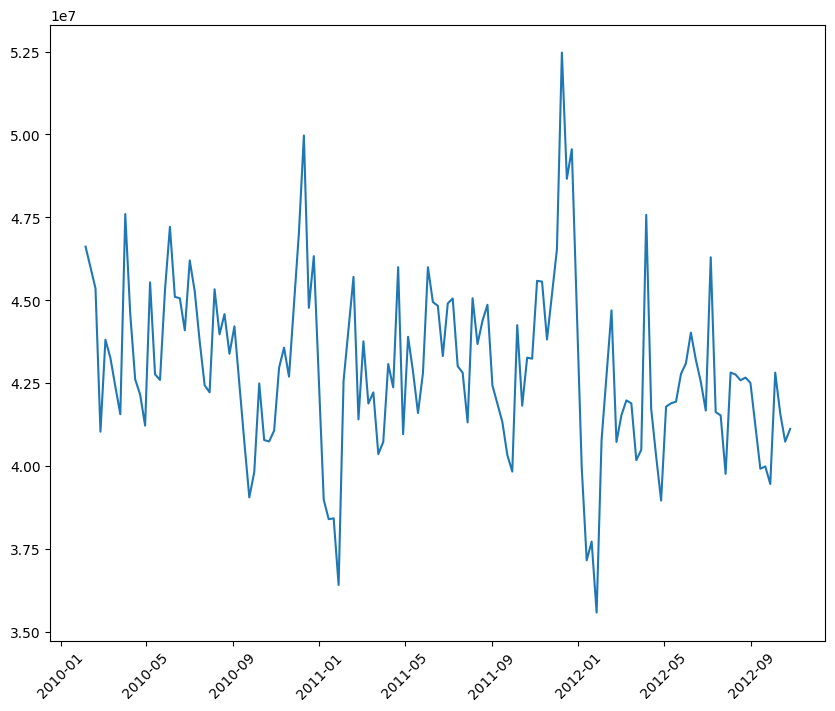

In [489]:
weekly_sales=df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales
plt.figure(figsize=(10,8))
plt.plot(weekly_sales)
plt.xticks(rotation=45)
plt.show()

In [493]:
weekly_sales=df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales

,Weekly_Sales
Date,
2010-02-05,46619845.70
2010-02-19,45363033.79
2010-02-26,41043557.90
2010-03-05,43813776.69
2010-03-12,43270901.25
...,...
2012-09-28,39468648.67
2012-10-05,42823075.29
2012-10-12,41600039.67


In [494]:
from statsmodels.tsa.stattools import adfuller
weekly_sales=df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales
result = adfuller(df['Weekly_Sales'])
result
if result[1] <= 0.05:
  print('Null hypothesis is rejected thus data is stationary')
else:
  print('Null Hypothesis is accepted, thus data is non stationary')

Null hypothesis is rejected thus data is stationary


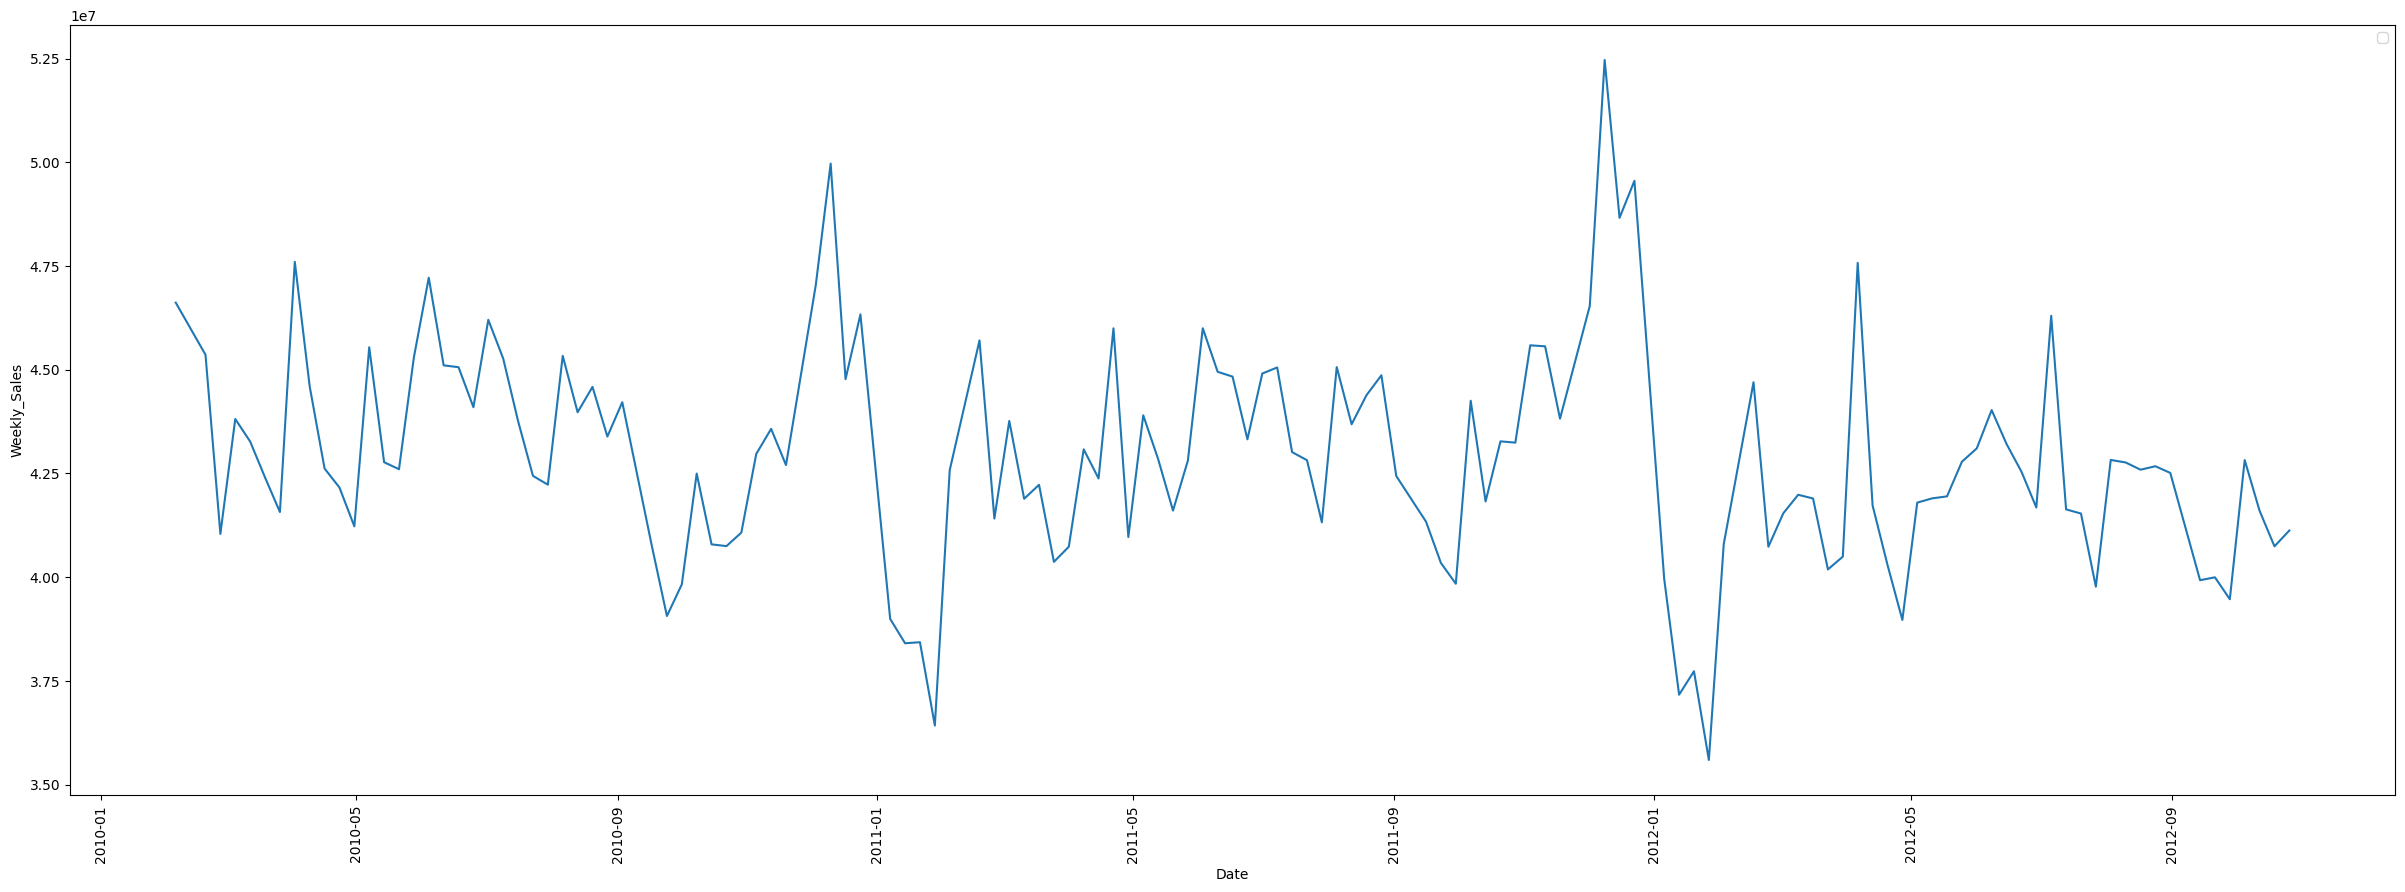

In [464]:
weekly_sales=df.groupby('Date')['Weekly_Sales'].sum()
weekly_sale=pd.DataFrame(weekly_sales.reset_index())

plt.figure(figsize=(30,10))
sns.lineplot(data=weekly_sale,x='Date',y='Weekly_Sales')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [465]:
weekly_sale.head()

,Date,Weekly_Sales
0,2010-02-05,46619845.70
1,2010-02-19,45363033.79
2,2010-02-26,41043557.90
3,2010-03-05,43813776.69
4,2010-03-12,43270901.25


In [466]:
weekly_sales=df.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales

,Date,Weekly_Sales
0,2010-02-05,46619845.70
1,2010-02-19,45363033.79
2,2010-02-26,41043557.90
3,2010-03-05,43813776.69
4,2010-03-12,43270901.25
...,...,...
128,2012-09-28,39468648.67
129,2012-10-05,42823075.29
130,2012-10-12,41600039.67
131,2012-10-19,40743817.45


In [467]:
!pip install prophet

In [468]:
weekly_sales.columns=['ds','y']
weekly_sales

,ds,y
0,2010-02-05,46619845.70
1,2010-02-19,45363033.79
2,2010-02-26,41043557.90
3,2010-03-05,43813776.69
4,2010-03-12,43270901.25
...,...,...
128,2012-09-28,39468648.67
129,2012-10-05,42823075.29
130,2012-10-12,41600039.67
131,2012-10-19,40743817.45


In [469]:
from prophet import Prophet
m=Prophet()

In [470]:
m.fit(weekly_sales)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphd1ukkb8/r0h4k0b_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphd1ukkb8/pqfeu5gg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31936', 'data', 'file=/tmp/tmphd1ukkb8/r0h4k0b_.json', 'init=/tmp/tmphd1ukkb8/pqfeu5gg.json', 'output', 'file=/tmp/tmphd1ukkb8/prophet_modelthpp3zmx/prophet_model-20250914153756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:37:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:37:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [471]:
future=m.make_future_dataframe(periods=12)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4.422608e+07,4.165967e+07,4.538263e+07,4.422608e+07,4.422608e+07,-6.653499e+05,-6.653499e+05,-6.653499e+05,-6.653499e+05,-6.653499e+05,-6.653499e+05,0.0,0.0,0.0,4.356073e+07
1,2010-02-19,4.415980e+07,4.332147e+07,4.691500e+07,4.415980e+07,4.415980e+07,9.579267e+05,9.579267e+05,9.579267e+05,9.579267e+05,9.579267e+05,9.579267e+05,0.0,0.0,0.0,4.511773e+07
2,2010-02-26,4.412666e+07,4.215689e+07,4.595743e+07,4.412666e+07,4.412666e+07,-1.274955e+05,-1.274955e+05,-1.274955e+05,-1.274955e+05,-1.274955e+05,-1.274955e+05,0.0,0.0,0.0,4.399917e+07
3,2010-03-05,4.409352e+07,4.089883e+07,4.456323e+07,4.409352e+07,4.409352e+07,-1.270190e+06,-1.270190e+06,-1.270190e+06,-1.270190e+06,-1.270190e+06,-1.270190e+06,0.0,0.0,0.0,4.282334e+07
4,2010-03-12,4.406039e+07,4.044332e+07,4.421796e+07,4.406039e+07,4.406039e+07,-1.716764e+06,-1.716764e+06,-1.716764e+06,-1.716764e+06,-1.716764e+06,-1.716764e+06,0.0,0.0,0.0,4.234362e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2012-11-03,4.183951e+07,3.996208e+07,4.384313e+07,4.183951e+07,4.183953e+07,1.061519e+05,1.061519e+05,1.061519e+05,1.061519e+05,1.061519e+05,1.061519e+05,0.0,0.0,0.0,4.194567e+07
141,2012-11-04,4.183627e+07,4.004361e+07,4.393423e+07,4.183623e+07,4.183631e+07,1.677818e+05,1.677818e+05,1.677818e+05,1.677818e+05,1.677818e+05,1.677818e+05,0.0,0.0,0.0,4.200405e+07
142,2012-11-05,4.183302e+07,4.020301e+07,4.395612e+07,4.183295e+07,4.183315e+07,2.313374e+05,2.313374e+05,2.313374e+05,2.313374e+05,2.313374e+05,2.313374e+05,0.0,0.0,0.0,4.206436e+07
143,2012-11-06,4.182978e+07,4.022145e+07,4.392426e+07,4.182958e+07,4.182998e+07,2.972165e+05,2.972165e+05,2.972165e+05,2.972165e+05,2.972165e+05,2.972165e+05,0.0,0.0,0.0,4.212699e+07


In [472]:
forecast[['ds','yhat','yhat_lower',	'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-02-05,4.356073e+07,4.165967e+07,4.538263e+07
1,2010-02-19,4.511773e+07,4.332147e+07,4.691500e+07
2,2010-02-26,4.399917e+07,4.215689e+07,4.595743e+07
3,2010-03-05,4.282334e+07,4.089883e+07,4.456323e+07
4,2010-03-12,4.234362e+07,4.044332e+07,4.421796e+07
...,...,...,...,...
140,2012-11-03,4.194567e+07,3.996208e+07,4.384313e+07
141,2012-11-04,4.200405e+07,4.004361e+07,4.393423e+07
142,2012-11-05,4.206436e+07,4.020301e+07,4.395612e+07
143,2012-11-06,4.212699e+07,4.022145e+07,4.392426e+07


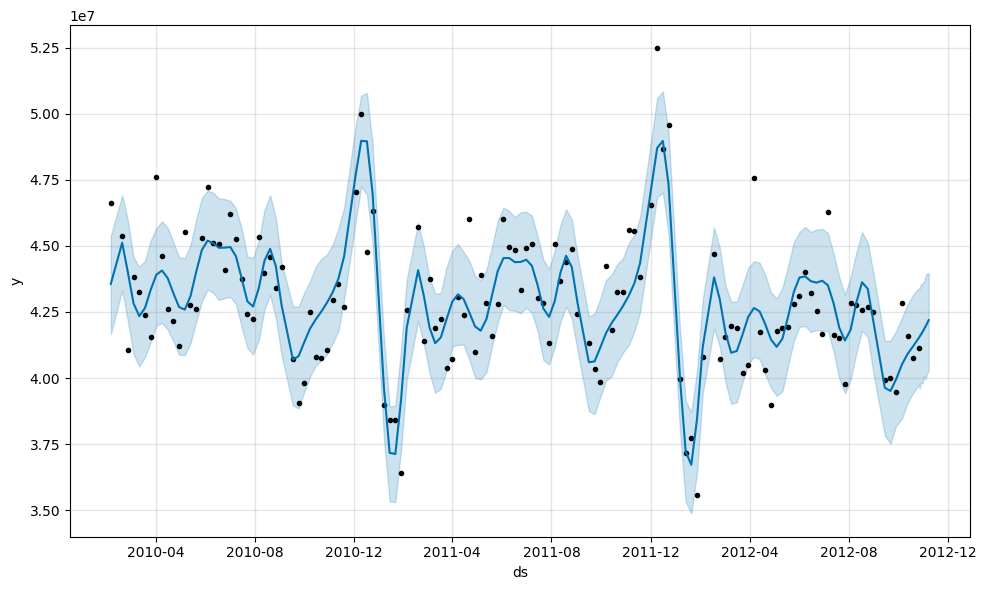

In [496]:
m.plot(forecast)
plt.show()

In [501]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [507]:
print("--- Augmented Dickey-Fuller Test Results ---")
adftest_statistic, p_value, lags_used, num_observations, critical_values, icbest = adfuller(
    weekly_sales.dropna()
)
print(f"ADF Statistic: {adftest_statistic}")
print(f"P-value: {p_value}")
print(f"Lags used: {lags_used}")
print(f"Number of observations: {num_observations}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")
print("\nInterpretation: The p-value is 0.0, which is less than 0.05. We reject the null hypothesis of non-stationarity. The data is stationary.")
print("\n--- Generating Sales Forecast for Next 12 Weeks ---")
model = SARIMAX(weekly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)
forecast = model_fit.get_forecast(steps=12)
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_df = pd.DataFrame({
    'Predicted_Sales': predicted_values,
    'Lower_CI': confidence_intervals['lower Weekly_Sales'],
    'Upper_CI': confidence_intervals['upper Weekly_Sales']
})
pd.options.display.float_format = '${:,.2f}'.format
print("Numeric Forecast for Store 1 (Next 12 Weeks):")
pd.DataFrame(forecast_df)

--- Augmented Dickey-Fuller Test Results ---
ADF Statistic: -4.091361463406473
P-value: 0.0010008626126924572
Lags used: 8
Number of observations: 124
Critical Values:
  1%: -3.484219653271961
  5%: -2.885145235641637
  10%: -2.579359138917794

Interpretation: The p-value is 0.0, which is less than 0.05. We reject the null hypothesis of non-stationarity. The data is stationary.

--- Generating Sales Forecast for Next 12 Weeks ---
Numeric Forecast for Store 1 (Next 12 Weeks):


,Predicted_Sales,Lower_CI,Upper_CI
133,"$40,619,212.68","$33,124,469.24","$48,113,956.12"
134,"$40,911,357.73","$31,540,796.61","$50,281,918.84"
135,"$40,760,405.46","$29,029,454.38","$52,491,356.55"
136,"$40,751,986.47","$27,594,001.65","$53,909,971.29"
137,"$40,466,738.14","$25,655,154.15","$55,278,322.13"
138,"$40,474,707.65","$24,434,655.69","$56,514,759.61"
139,"$40,683,681.20","$23,319,728.56","$58,047,633.83"
140,"$40,359,254.56","$21,897,348.93","$58,821,160.20"
141,"$39,652,858.77","$20,059,572.47","$59,246,145.08"
142,"$40,095,714.70","$19,502,349.29","$60,689,080.11"
